# Modelling

This notebook contains model training and selection processes.

## Import Necessary Libraries


In [42]:
import functions as f
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Load in Dataset


In [43]:
#load clean data
df  = pd.read_csv('data_clean')

<IPython.core.display.Javascript object>

In [44]:
# checking for null values
df.isnull().sum()

Reviews_tokenize_join    17
target                    0
dtype: int64

In [45]:
# dropna values
df.dropna(inplace = True)

## Data Engineering

I use tf-idf vectorization in my modeling



In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range = (1,2), stop_words='english')
tfidfv = tfidf.fit_transform(df['Reviews_tokenize_join']).toarray()

Train, test, and split:



In [47]:
 X_train, X_test, y_train, y_test = train_test_split(tfidfv, df['target'],test_size = 0.3,random_state=1)

<IPython.core.display.Javascript object>

## Models

I am going to implement different classifiers to see which works best:
- K Nearest Neighbors
- Decision Tree
- Bagged Trees
- Random Forest
- AdaBoost
- Gradient Boost
- XGBoost
- Multinomial Naive Bayes

### Logistic Regresion

In [48]:
dc_LR = f.model(LogisticRegression(), 'Logistic_Regresion', df['Reviews_tokenize_join'], df['target'] )

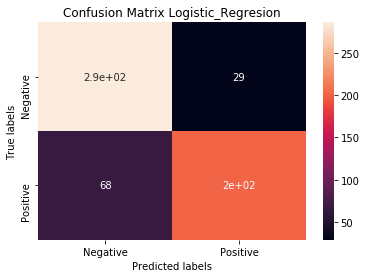

In [49]:
f.confusion_m(LogisticRegression(), 'Logistic_Regresion' , df['Reviews_tokenize_join'], df['target'])


### KNN

In [7]:
dc_KNN = f.model(KNeighborsClassifier(), 'KNN', df['Reviews_tokenize_join'], df['target'])

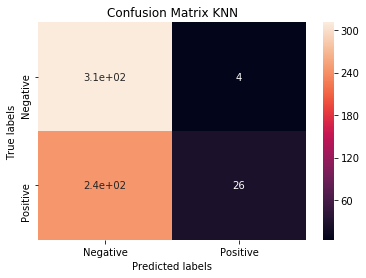

In [8]:
f.confusion_m(KNeighborsClassifier(), 'KNN' , df['Reviews_tokenize_join'], df['target'])

### Decision Tree Classifier

In [9]:
dc_DT = f.model(DecisionTreeClassifier(),'DecisionTree' , df['Reviews_tokenize_join'], df['target'])

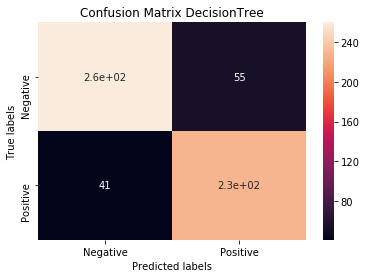

In [10]:
f.confusion_m(DecisionTreeClassifier(),'DecisionTree', df['Reviews_tokenize_join'], df['target'])

### Bagged Trees

In [11]:
dc_BT = f.model(BaggingClassifier(),'Bagged Tree', df['Reviews_tokenize_join'], df['target'])

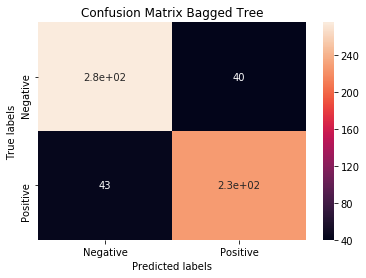

In [12]:
f.confusion_m(BaggingClassifier(),'Bagged Tree', df['Reviews_tokenize_join'], df['target'])

### Random Forest 

In [13]:
dc_RF = f.model(RandomForestClassifier(),'Random Forest', df['Reviews_tokenize_join'], df['target'])

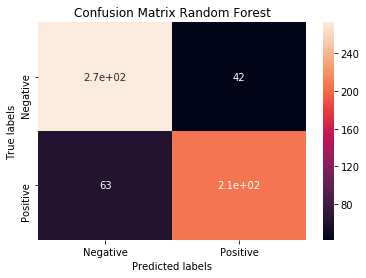

In [14]:
f.confusion_m(RandomForestClassifier(),'Random Forest', df['Reviews_tokenize_join'], df['target'])

### AdaBoots

In [15]:
dc_ada = f.model(AdaBoostClassifier(),'AdaBoost' , df['Reviews_tokenize_join'], df['target'])

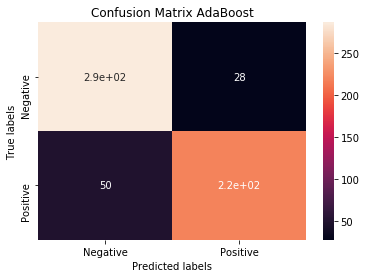

In [16]:
f.confusion_m(AdaBoostClassifier(),'AdaBoost', df['Reviews_tokenize_join'], df['target'])

### Gradient_boosting

In [17]:
dc_boosting = f.model(GradientBoostingClassifier(),'Gradient_Boosting', df['Reviews_tokenize_join'], df['target'])

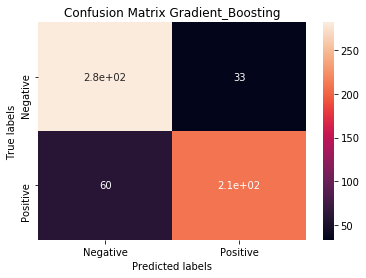

In [18]:
f.confusion_m(GradientBoostingClassifier(),'Gradient_Boosting' , df['Reviews_tokenize_join'], df['target'])

### XGB 

In [20]:
dc_xgb = f.model(XGBClassifier(),'XGB', df['Reviews_tokenize_join'], df['target'])

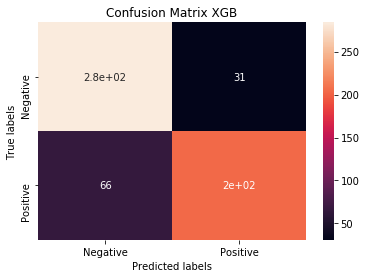

In [21]:
f.confusion_m(XGBClassifier(),'XGB',df['Reviews_tokenize_join'], df['target'])

### MultinomialNB

In [22]:
dc_NB = f.model(MultinomialNB(), 'MultinomialNB', df['Reviews_tokenize_join'], df['target'])

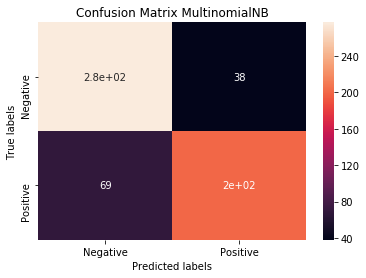

In [23]:
f.confusion_m(MultinomialNB(),'MultinomialNB',df['Reviews_tokenize_join'], df['target'])

## Results Summary 


In [41]:
list_result = [dc_LR, dc_KNN , dc_DT ,dc_BT, dc_RF, dc_ada, dc_boosting, dc_xgb , dc_NB]


In [37]:
df_results = pd.DataFrame((i for i in list_result) , columns=['Model','Accuracy_score', 'Recall_score', 'Precision_score','F1_score','ROC_score'] )

<IPython.core.display.Javascript object>

In [39]:
df_results = df_results.set_index('Model')


In [40]:
df_results

,Accuracy_score,Recall_score,Precision_score,F1_score,ROC_score
Model,,,,,
Logistic_Regresion,0.834188,0.748148,0.874459,0.806387,0.828042
KNN,0.576068,0.096296,0.866667,0.173333,0.541799
DecisionTree,0.839316,0.848148,0.812057,0.829710,0.839947
Bagged Tree,0.861538,0.848148,0.851301,0.849722,0.860582
Random Forest,0.822222,0.751852,0.845833,0.796078,0.817196
AdaBoost,0.866667,0.814815,0.887097,0.849421,0.862963
Gradient_Boosting,0.849573,0.796296,0.866935,0.830116,0.845767
XGB,0.834188,0.755556,0.868085,0.807921,0.828571
MultinomialNB,0.817094,0.744444,0.841004,0.789784,0.811905


Looking at metrics, AdaBoosting is the best classifier.